In [3]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split as tts 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

import statistics as st
from statistics import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Loading Dataset

In [4]:
df = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Primary Check

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Convert TotalCharges to Float from object type

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
main = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.duplicated().sum()

0

In [9]:
d1 = df

## Creating Average charges based on tenure, monthly charges and total charges

In [10]:
df.insert(loc = 20, column = 'AvgCharges', value =  df['TotalCharges'] / df['tenure'])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,55.573529,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,54.075000,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,40.905556,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,75.825000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,82.937500,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,102.262500,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,31.495455,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,76.650000,Yes


In [11]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
AvgCharges          11
Churn                0
dtype: int64

In [12]:
df[df['AvgCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,NaN,No


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgCharges
count,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441,64.799424
std,0.368612,24.559481,30.090047,2266.771362,30.185891
min,0.000000,0.000000,18.250000,18.800000,13.775000
25%,0.000000,9.000000,35.500000,401.450000,36.179891
50%,0.000000,29.000000,70.350000,1397.475000,70.373239
75%,0.000000,55.000000,89.850000,3794.737500,90.179560
max,1.000000,72.000000,118.750000,8684.800000,121.400000


In [14]:
df["AvgCharges"].fillna(df["MonthlyCharges"], inplace=True)
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
AvgCharges          0
Churn               0
dtype: int64

In [15]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'AvgCharges',
       'Churn']]).corr()
corr_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.016567,0.220173,0.102395,0.217917,0.001874,-0.001874,-0.016479,0.016479,0.211185,...,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477,-0.150889,0.150889
tenure,0.016567,1.000000,0.247900,0.824757,0.247234,-0.005106,0.005106,-0.379697,0.379697,-0.159712,...,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852,0.352229,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.650468,0.996244,0.014569,-0.014569,-0.096848,0.096848,0.113890,...,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437,-0.193356,0.193356
TotalCharges,0.102395,0.824757,0.650468,1.000000,0.650323,-0.000048,0.000048,-0.318812,0.318812,-0.064535,...,0.170491,0.357224,-0.157676,0.157676,0.185992,0.182581,-0.060412,-0.294125,0.199428,-0.199428
AvgCharges,0.217917,0.247234,0.996244,0.650323,1.000000,0.015294,-0.015294,-0.096157,0.096157,0.114022,...,0.005355,-0.073872,-0.349685,0.349685,0.042194,0.030446,0.270828,-0.375831,-0.192531,0.192531
gender_Female,0.001874,-0.005106,0.014569,-0.000048,0.015294,1.000000,-1.000000,-0.001808,0.001808,0.010517,...,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744,-0.008612,0.008612
gender_Male,-0.001874,0.005106,-0.014569,0.000048,-0.015294,-1.000000,1.000000,0.001808,-0.001808,-0.010517,...,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744,0.008612,-0.008612
Partner_No,-0.016479,-0.379697,-0.096848,-0.318812,-0.096157,-0.001808,0.001808,1.000000,-1.000000,0.452676,...,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125,-0.150448,0.150448
Partner_Yes,0.016479,0.379697,0.096848,0.318812,0.096157,0.001808,-0.001808,-1.000000,1.000000,-0.452676,...,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.150448,-0.150448
Dependents_No,0.211185,-0.159712,0.113890,-0.064535,0.114022,0.010517,-0.010517,0.452676,-0.452676,1.000000,...,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071,-0.164221,0.164221


In [16]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'AvgCharges',
       'Churn']]).corr()

for i in corr_df.columns:
    corr_df.loc[i] = corr_df.loc[i].between(0.8, 1, inclusive='neither')  # Use 'neither' for exclusive range
corrlis = []
for i in corr_df.index:
    for j in corr_df.columns:
        if corr_df.loc[i, j] == True:
            corrlis.append([i, j])
corrlis


[['tenure', 'TotalCharges'],
 ['MonthlyCharges', 'AvgCharges'],
 ['TotalCharges', 'tenure'],
 ['AvgCharges', 'MonthlyCharges']]

In [17]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'AvgCharges',
       'Churn']]).corr()

corr_df['Churn_Yes'].sort_values().iloc[1:-1]

tenure                                    -0.352229
Contract_Two year                         -0.302253
OnlineBackup_No internet service          -0.227890
StreamingTV_No internet service           -0.227890
TechSupport_No internet service           -0.227890
StreamingMovies_No internet service       -0.227890
DeviceProtection_No internet service      -0.227890
OnlineSecurity_No internet service        -0.227890
InternetService_No                        -0.227890
TotalCharges                              -0.199428
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMetho

In [18]:
df = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,AvgCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,55.573529,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.075000,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),40.905556,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.825000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,82.937500,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),102.262500,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,31.495455,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,76.650000,Yes


In [19]:
df_visual = main

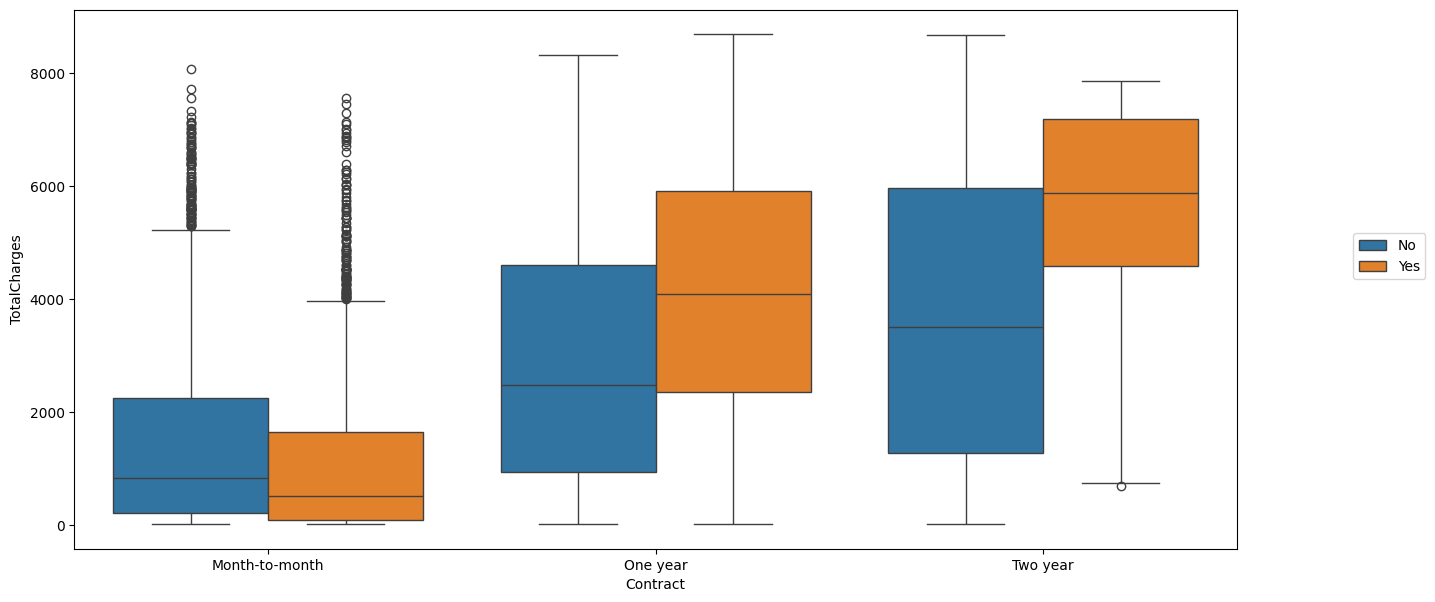

In [20]:
# distribution of TotalCharges per Contract type
plt.figure(figsize=(15,7))
sns.boxplot(data=df_visual,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

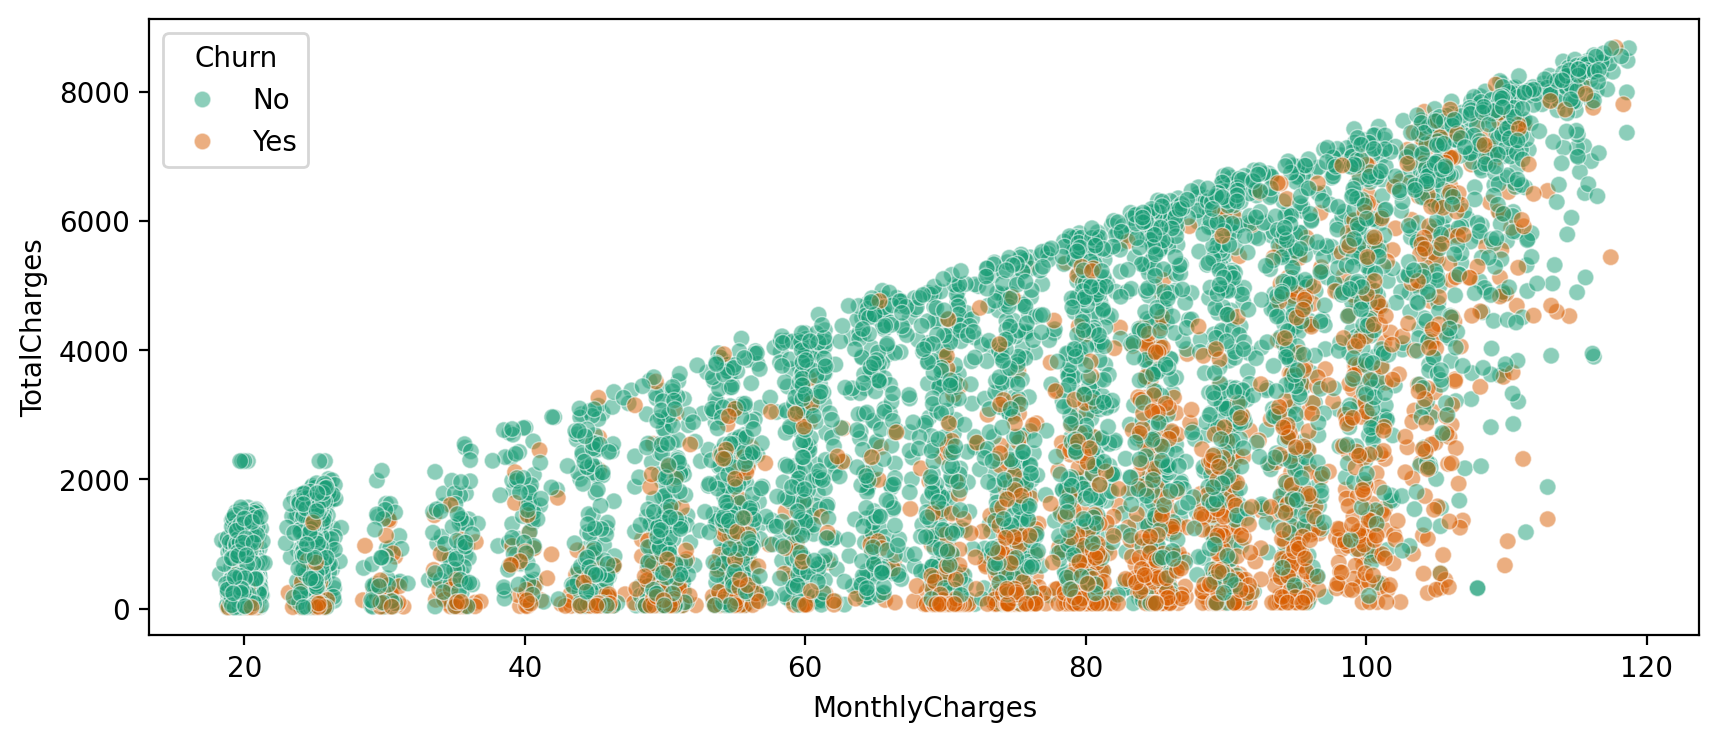

In [21]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df_visual,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

Text(0, 0.5, "Churn 'yes' Percentage")

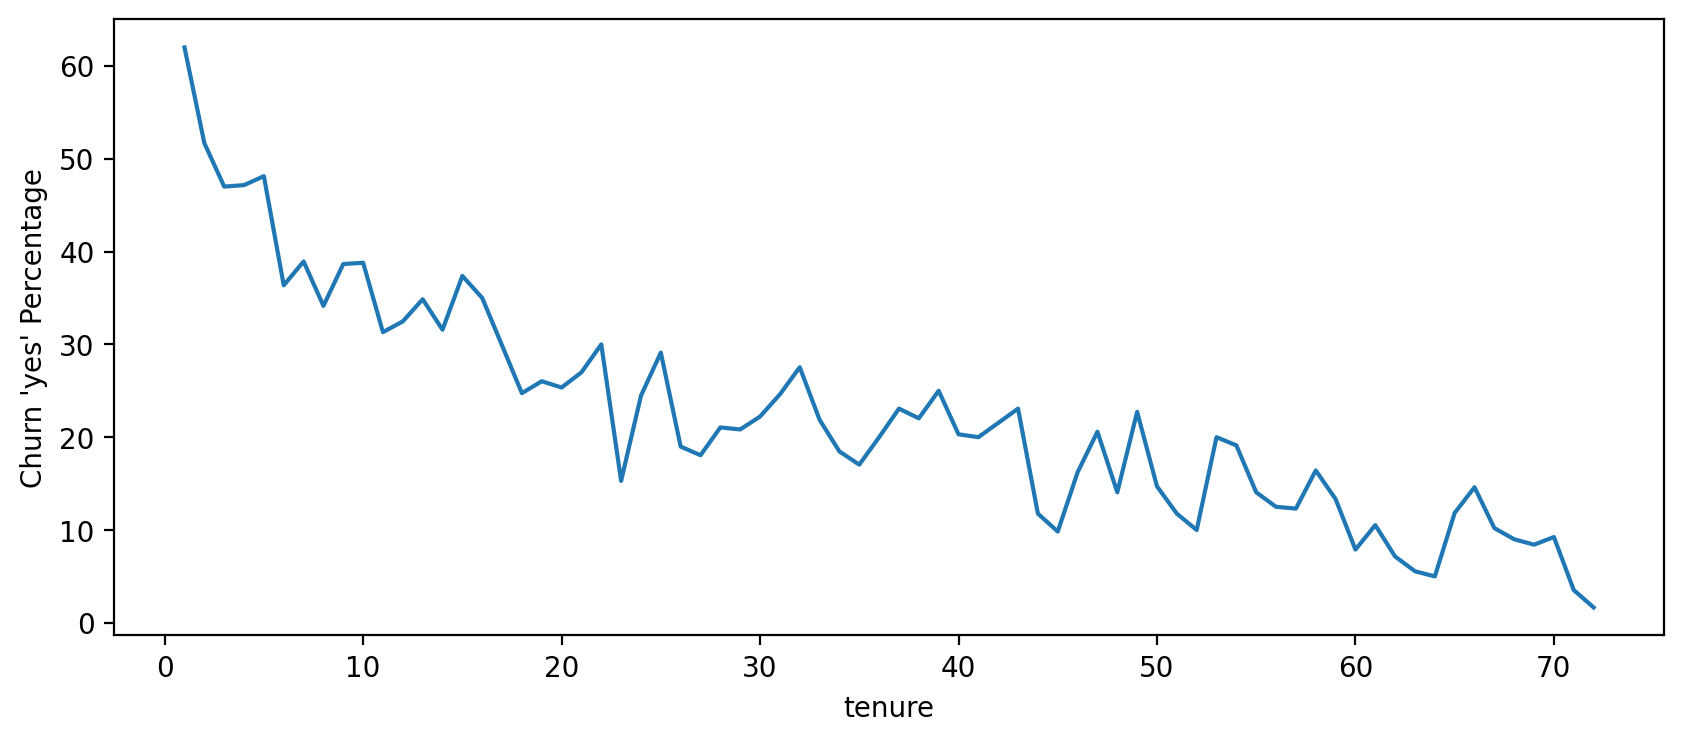

In [22]:
no_churn = df_visual.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df_visual.groupby(['Churn','tenure']).count().transpose()['Yes']

churn_rate = 100 * yes_churn / (no_churn+yes_churn)

churn_rate.transpose()['customerID']

plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn \'yes\' Percentage')

<Axes: xlabel='Churn', ylabel='count'>

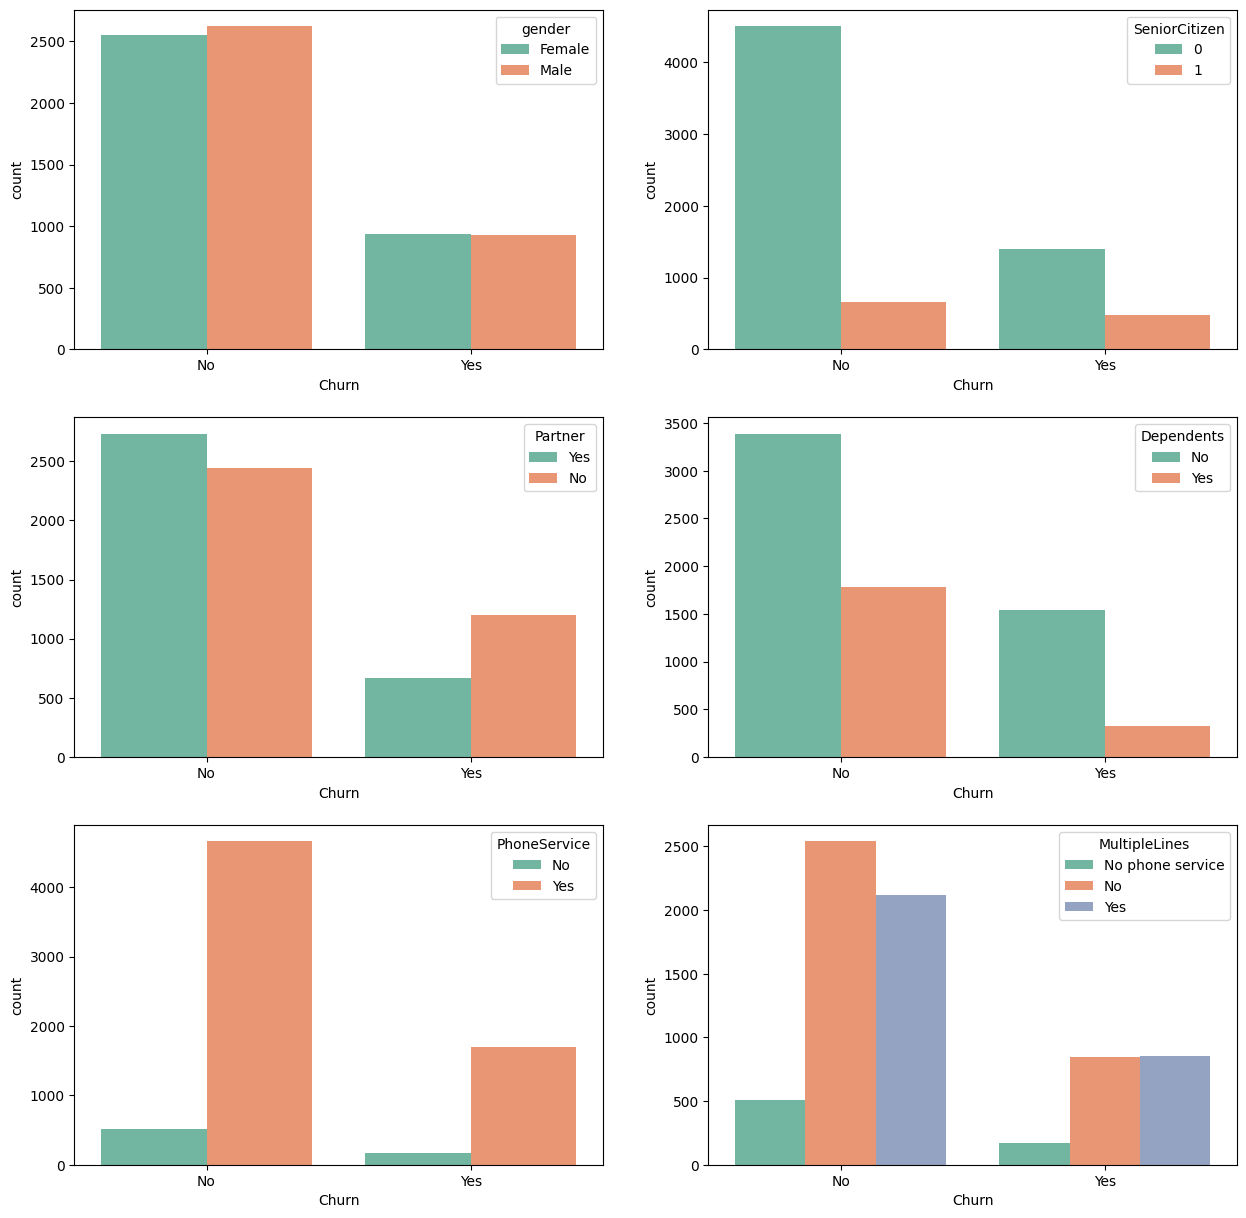

In [23]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'Churn', hue = 'gender', palette = 'Set2', data = df_visual)

plt.subplot(3,2,2)
sns.countplot(x = 'Churn', hue = 'SeniorCitizen', palette = 'Set2', data = df_visual)

plt.subplot(3,2,3)
sns.countplot(x = 'Churn', hue = 'Partner', palette = 'Set2', data = df_visual)

plt.subplot(3,2,4)
sns.countplot(x = 'Churn', hue = 'Dependents', palette = 'Set2', data = df_visual)

plt.subplot(3,2,5)
sns.countplot(x = 'Churn', hue = 'PhoneService', palette = 'Set2', data = df_visual)

plt.subplot(3,2,6)
sns.countplot(x = 'Churn', hue = 'MultipleLines', palette = 'Set2', data = df_visual)

<Axes: xlabel='Churn', ylabel='count'>

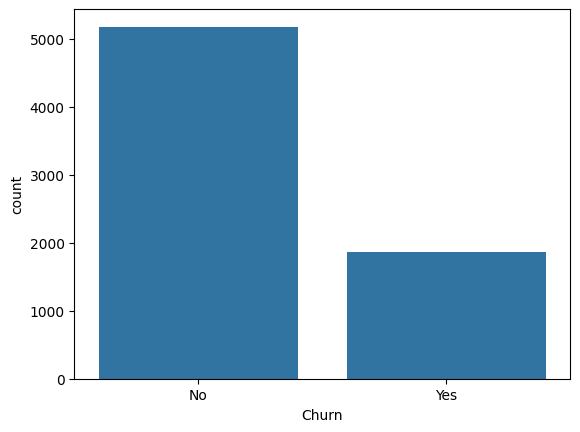

In [24]:
sns.countplot(data=df,x='Churn')

In [25]:
final = df.drop(['customerID', 'gender'], axis=1)
final.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,AvgCharges,Churn
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,No
1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,55.573529,No
2,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.075000,Yes
3,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),40.905556,No
4,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.825000,Yes


In [26]:
for col in final:
    print(col, df[col].unique())

SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
AvgCharges [ 29.85        55.57352941  54.075      ...  31.49545455  76.65
 103.70454545]
Churn ['No' 'Yes']


In [27]:
from sklearn.preprocessing import LabelEncoder

cols = final.columns.to_list()

label_encoder = LabelEncoder()
test = final['Churn']
final = final.drop(['Churn'], axis = 1)


for i in range(len(cols)-2):
    final[cols[i]] = label_encoder.fit_transform(final[cols[i]])

final['Churn'] = label_encoder.fit_transform(test)

final

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,AvgCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.850000,0
1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,55.573529,0
2,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,54.075000,1
3,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,40.905556,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,75.825000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,82.937500,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,102.262500,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,31.495455,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,76.650000,1


In [28]:
for col in final:
    print(col, final[col].unique())

SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
PhoneService [0 1]
MultipleLines [1 0 2]
InternetService [0 1 2]
OnlineSecurity [0 2 1]
OnlineBackup [2 0 1]
DeviceProtection [0 2 1]
TechSupport [0 2 1]
StreamingTV [0 2 1]
StreamingMovies [0 2 1]
Contract [0 1 2]
PaperlessBilling [1 0]
PaymentMethod [2 3 0 1]
AvgCharges [ 29.85        55.57352941  54.075      ...  31.49545455  76.65
 103.70454545]
Churn [0 1]


In [29]:
testing = d1.drop(['customerID'],axis=1)

cols = testing.columns.to_list()

label_encoder = LabelEncoder()
test = testing['Churn']
testing = testing.drop(['Churn'], axis = 1)


for i in range(len(cols)-4):
    testing[cols[i]] = label_encoder.fit_transform(testing[cols[i]])

testing['Churn'] = label_encoder.fit_transform(test)

testing

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,29.850000,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,55.573529,0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,54.075000,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,40.905556,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,75.825000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1990.50,82.937500,0
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,7362.90,102.262500,0
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,346.45,31.495455,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,306.60,76.650000,1


# Models

In [30]:
X = final.drop(['Churn'],axis=1)
y = final['Churn']

### *testing*

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 16)
(1409, 16)
(5634,)
(1409,)


### *Scaling*

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto')
X_train_res, y_train_res = sm.fit_resample(X, y)

In [33]:
loll = pd.concat([X_train_res, y_train_res], axis=1)
loll

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,AvgCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.850000,0
1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,55.573529,0
2,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,54.075000,1
3,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,40.905556,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,75.825000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.244105,1
10344,0,1,0,1,0,1,0,0,0,0,2,0,0,1,0,79.056342,1
10345,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,68.579799,1
10346,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,22.743616,1


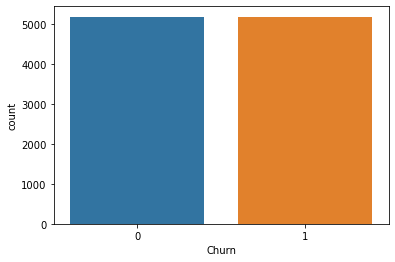

In [ ]:
sns.countplot(data=loll,x='Churn')

In [58]:
# x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.2)
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X_train_res, y_train_res)
x_train, x_test, y_train, y_test = tts(X,y,test_size=0.2)

## *LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, GaussianNB, SVM*

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


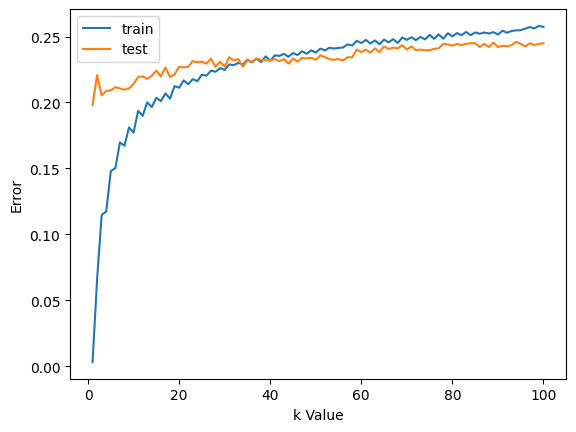

In [59]:
from tqdm import tqdm

error1= []
error2= []
for k in tqdm(range(1,101)):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))

# plt.figure(plt.figsize(20,10))
plt.plot(range(1,101),error1,label="train")
plt.plot(range(1,101),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [60]:
# MODELS CREATION
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()#max_depth=3, criterion='log_loss', max_features='sqrt') # criterion = 'gini', max_depth=11, min_samples_split=2)
model3 = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth=11, min_samples_leaf=40, min_samples_split=2)
model4 = KNeighborsClassifier(n_neighbors=63)
model5 = GaussianNB()
model6 = SVC(C=1)

In [61]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)
model6.fit(x_train,y_train)

c:\Users\Teba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(C=1)

In [62]:
print('LogisticRegression :\t\t\t',model1.score(x_test, y_test)) # LogisticRegression
print('DecisionTreeClassifier :\t\t',model2.score(x_test, y_test)) # DecisionTreeClassifier
print('RandomForestClassifier :\t\t',model3.score(x_test, y_test)) # RandomForestClassifier
print('KNeighborsClassifier :\t\t\t',model4.score(x_test, y_test)) # KNeighborsClassifier
print('GaussianNB :\t\t\t\t',model5.score(x_test, y_test)) # GaussianNB
print('SVM :\t\t\t\t\t',model6.score(x_test, y_test)) # SVM

LogisticRegression :			 0.7980676328502415
DecisionTreeClassifier :		 0.7613526570048309
RandomForestClassifier :		 0.8057971014492754
KNeighborsClassifier :			 0.7589371980676328
GaussianNB :				 0.778743961352657
SVM :					 0.7676328502415459


In [63]:
# import pickle

# filename='LRmodel.pkl'
# pickle.dump(model1, open(filename, 'wb'))

# filename='DTCmodel.pkl'
# pickle.dump(model2, open(filename, 'wb'))

# filename='RFCmodel.pkl'
# pickle.dump(model3, open(filename, 'wb'))

# filename='KNNmodel.pkl'
# pickle.dump(model4, open(filename, 'wb'))

# filename='GNBmodel.pkl'
# pickle.dump(model5, open(filename, 'wb'))

# filename='SVMmodel.pkl'
# pickle.dump(model6, open(filename, 'wb'))

----

![](./res/Screenshot%202022-12-31%20233701.png)

----

In [64]:

# Step 15.1: Compare Baseline Classification Algorithms - First Iteration
# Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('LogisticRegression', model1))
models.append(('DecisionTreeClassifier', model2))
models.append(('RandomForest', model3))
models.append(('KNN', model4))
models.append(('GaussianNB', model5))
models.append(('SVC', model6))
# models.append(('Kernel SVM', SVC()))


# Evaluating Model Results:


acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=5) # , random_state=0)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy') # accuracy scoring

    cv_auc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc') # roc_auc scoring

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

c:\Users\Teba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Teba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,RandomForest,85.93,1.02,77.55,0.99
0,LogisticRegression,85.27,0.76,77.39,0.81
4,GaussianNB,83.98,1.04,76.43,0.73
5,SVC,82.51,0.90,74.91,0.63
3,KNN,82.42,1.07,74.44,0.85
1,DecisionTreeClassifier,76.30,0.69,76.23,0.56


In [70]:
import plotly.express as px

px.bar(data_frame = model_results, x = 'Accuracy Mean', y = 'Algorithm', color = 'Accuracy Mean', template = 'plotly_dark', title = 'Models Comparison')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Accuracy Mean=%{marker.color}<br>Algorithm=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([77.39, 76.23, 77.55, 74.44, 76.43, 74.91]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([77.39, 76.23, 77.55, 74.44, 76.43, 74.91]),
              'xaxis': 'x',
              'y': array(['LogisticRegression', 'DecisionTreeClassifier', 'RandomForest', 'KNN',
                          'GaussianNB', 'SVC'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Accuracy Mean'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Models Comparison'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Accuracy Mean'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Algorithm'}}}
})

## *MetaModel dataset*

In [ ]:
# PREDICTION
pred1=np.array(model1.predict(x_test))
pred2=np.array(model2.predict(x_test))
pred3=np.array(model3.predict(x_test))
pred4=np.array(model4.predict(x_test))
pred5=np.array(model5.predict(x_test))
pred6=np.array(model6.predict(x_test))

In [ ]:
metabag = pd.DataFrame()

metabag['LogisticRegression'] = pred1
metabag['DecisionTreeClassifier'] = pred2
metabag['RandomForestClassifier'] = pred3
metabag['KNeighborsClassifier'] = pred4
metabag['GaussianNB'] = pred5
metabag['SVM'] = pred6
metabag['Test'] = np.array(y_test)

metabag

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,GaussianNB,SVM,Test
0,1,0,1,1,1,1,1
1,0,1,0,0,0,0,0
2,1,1,1,1,1,0,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2065,1,1,1,1,1,1,1
2066,0,0,0,0,0,0,0
2067,1,0,1,1,1,1,1
2068,0,1,0,1,0,0,0


### ***Max voting***

In [ ]:
y_pred_MAX = np.zeros(y_test.shape[0])
for i in range(y_pred_MAX.shape[0]):
    y_pred_MAX[i] = metabag.iloc[i,:].mode()
print("Majority voting Score:", accuracy_score(y_test, y_pred_MAX))

Majority voting Score: 0.8120772946859903


In [ ]:
meta_x_train, meta_x_test, meta_y_train, meta_y_test = tts(metabag[metabag.columns[:-1]],metabag['Test'],test_size=0.2)

### ***Bagging***
Bagging is mostly used to reduce the variance in a model. A simple example of bagging is the Random Forest algorithm.

In [ ]:
X, y =  x_train, y_train
RANDOM_SEED = 0

#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
et_clf = ExtraTreesClassifier(n_estimators=5, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
rg_clf = RidgeClassifier(alpha=0.1, random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
adab_clf = AdaBoostClassifier(n_estimators=5,learning_rate=0.001)

classifier_array = [rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf]
labels = [clf.__class__.__name__ for clf in classifier_array]

normal_accuracy = []
normal_std = []
bagging_accuracy = []
bagging_std = []

for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=3, random_state=RANDOM_SEED)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)
    
    normal_accuracy.append(np.round(cv_scores.mean(),4))
    normal_std.append(np.round(cv_scores.std(),4))
    
    bagging_accuracy.append(np.round(bagging_scores.mean(),4))
    bagging_std.append(np.round(bagging_scores.std(),4))
    
    print("Accuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))
    print("Accuracy: %0.4f (+/- %0.4f) [Bagging %s]\n" % (bagging_scores.mean(), bagging_scores.std(), clf.__class__.__name__))

Accuracy: 0.7945 (+/- 0.0022) [Normal RandomForestClassifier]
Accuracy: 0.7672 (+/- 0.0028) [Bagging RandomForestClassifier]

Accuracy: 0.7823 (+/- 0.0028) [Normal ExtraTreesClassifier]
Accuracy: 0.7653 (+/- 0.0043) [Bagging ExtraTreesClassifier]

Accuracy: 0.7689 (+/- 0.0058) [Normal KNeighborsClassifier]
Accuracy: 0.7537 (+/- 0.0105) [Bagging KNeighborsClassifier]

Accuracy: 0.7775 (+/- 0.0070) [Normal SVC]
Accuracy: 0.7630 (+/- 0.0069) [Bagging SVC]

Accuracy: 0.7739 (+/- 0.0054) [Normal RidgeClassifier]
Accuracy: 0.7554 (+/- 0.0044) [Bagging RidgeClassifier]

Accuracy: 0.7769 (+/- 0.0055) [Normal LogisticRegression]
Accuracy: 0.7574 (+/- 0.0045) [Bagging LogisticRegression]

Accuracy: 0.7543 (+/- 0.0070) [Normal DecisionTreeClassifier]
Accuracy: 0.7578 (+/- 0.0046) [Bagging DecisionTreeClassifier]

Accuracy: 0.7478 (+/- 0.0031) [Normal AdaBoostClassifier]
Accuracy: 0.7527 (+/- 0.0028) [Bagging AdaBoostClassifier]



## ***Stacking***
Stacking is mostly used to increase the prediction accuracy of a model

### ***Single level stacking***

![](https://miro.medium.com/max/665/1*GB8U0rAuCmsQi-26EOmgKw.png)

In [ ]:
# Logisitic Regression
clf = LogisticRegression(random_state=0).fit(meta_x_train, meta_y_train)
y_pred_8 = clf.predict(meta_x_test)
print("LogReg: ", accuracy_score(meta_y_test, y_pred_8))
LogLis = []
LogLis.append(accuracy_score(meta_y_test, y_pred_8))

# DT
clf = DecisionTreeClassifier()
clf = clf.fit(meta_x_train, meta_y_train)
y_pred_2 = clf.predict(meta_x_test)
print("DT: ", accuracy_score(meta_y_test, y_pred_2))
DTLis = []
DTLis.append(accuracy_score(meta_y_test, y_pred_2))

#KNN
model = KNeighborsClassifier(n_neighbors=39)
model.fit(meta_x_train, meta_y_train)
y_pred_1 = model.predict(meta_x_test)
print("KNN: ", accuracy_score(meta_y_test, y_pred_1))
KNNLis = []
KNNLis.append(accuracy_score(meta_y_test, y_pred_1))

# GNB
clf = GaussianNB()
clf.fit(meta_x_train, meta_y_train)
y_pred_4 = clf.predict(meta_x_test)
print("GNB: ", accuracy_score(meta_y_test, y_pred_4))
GNBLis = []
GNBLis.append(accuracy_score(meta_y_test, y_pred_4))

# SVM
clf = SVC()
clf.fit(meta_x_train, meta_y_train)
y_pred_3 = clf.predict(meta_x_test)
print("SVM: ", accuracy_score(meta_y_test, y_pred_3))
SVMLis = []
SVMLis.append(accuracy_score(meta_y_test, y_pred_3))

# AdaBoost
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(meta_x_train, meta_y_train)
y_pred_5 = clf.predict(meta_x_test)
print("ADABOOST: ", accuracy_score(meta_y_test, y_pred_5))
ADALis = []
ADALis.append(accuracy_score(meta_y_test, y_pred_5))

LogReg:  0.7995169082125604
DT:  0.7971014492753623
KNN:  0.7898550724637681
GNB:  0.785024154589372
SVM:  0.7971014492753623
ADABOOST:  0.7971014492753623


In [ ]:
ens_res = pd.DataFrame(list(list(zip(KNNLis, DTLis, SVMLis, GNBLis, ADALis, LogLis))[0]), columns=['Accuracy'],index=['KNN','DT', 'SVM','GNB', 'ADABOOST','LOG_REG'])
ens_res

,Accuracy
KNN,0.789855
DT,0.797101
SVM,0.797101
GNB,0.785024
ADABOOST,0.797101
LOG_REG,0.799517


In [ ]:
acc = float(ens_res['Accuracy'].max())
max_ind = list(ens_res.idxmax())[0]
print(f"Max accuracy from stacking is {round(acc*100,3)}% with meta learner {max_ind}")

Max accuracy from stacking is 79.952% with meta learner LOG_REG


### ***Multilevel stacking***

![](https://static.javatpoint.com/tutorial/machine-learning/images/stacking-in-machine-learning2.png)

In [ ]:
# run it for K times
multi_df = testing
X = multi_df.iloc[:,:-1]
y = multi_df['Churn']

multi_x_train, multi_x_test, multi_y_train, multi_y_test = tts(X,y,test_size=0.2)

mxtraincopy = multi_x_train.copy()
mytraincopy = multi_y_train.copy()

K = 4
multi_pred = pd.DataFrame()
for i in range(K):

    print("\n")
    #LOGREG
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state=0).fit(multi_x_train, multi_y_train)
    y_pred_LOGREG = lr.predict(multi_x_train)
    print("lr:",i," ",cross_val_score(lr, multi_x_train, multi_y_train, cv=5))
    

    # DT
    dt = DecisionTreeClassifier()
    dt = dt.fit(multi_x_train, multi_y_train)
    y_pred_DT = dt.predict(multi_x_train)
    print("dt:",i," ",cross_val_score(dt, multi_x_train, multi_y_train, cv=5))

    #RF
    random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
    random_forest.fit(multi_x_train, multi_y_train)
    y_pred_RF = random_forest.predict(multi_x_train)
    print("rfc:",i," ",cross_val_score(random_forest, multi_x_train, multi_y_train, cv=5))

    #KNN
    knn = KNeighborsClassifier(n_neighbors=3)   
    knn.fit(multi_x_train, multi_y_train)
    y_pred_KNN = knn.predict(multi_x_train)
    print("knn:",i," ",cross_val_score(knn, multi_x_train, multi_y_train, cv=5))
    
    # AdaBoost
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier(n_estimators=100, random_state=0)
    ada.fit(multi_x_train, multi_y_train)
    y_pred_ADA = ada.predict(multi_x_train)
    print("ada:",i," ",cross_val_score(ada, multi_x_train, multi_y_train, cv=5))
   
    multi_x_train = pd.DataFrame()
    multi_x_train['LOGREG'] = y_pred_LOGREG
    multi_x_train['DT'] = y_pred_DT 
    multi_x_train['RF'] = y_pred_RF
    multi_x_train['KNN'] = y_pred_KNN
    multi_x_train['ADABOOST'] = y_pred_ADA 

c:\Users\Jegadit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Jegadit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Jegadit\anaconda3\lib\site-pa

lr: 0   [0.78615794 0.8216504  0.77905945 0.79946761 0.79218472]
dt: 0   [0.71960958 0.7364685  0.7284827  0.72937001 0.73712256]
rfc: 0   [0.79148181 0.8065661  0.77905945 0.79591837 0.79751332]
knn: 0   [0.73380657 0.75687666 0.75244011 0.75598935 0.76731794]
ada: 0   [0.78527063 0.82431233 0.76663709 0.81898846 0.80195382]


lr: 1   [0.99733807 0.99733807 0.99911269 0.99733807 0.9973357 ]
dt: 1   [0.99645075 0.99733807 0.99733807 0.99733807 0.9973357 ]
rfc: 1   [0.99645075 0.99733807 0.99733807 0.99733807 0.9973357 ]
knn: 1   [0.99645075 0.99733807 0.99822538 0.99733807 0.9973357 ]
ada: 1   [0.99822538 0.99822538 0.99822538 0.99733807 0.9973357 ]


lr: 2   [0.99822538 0.99822538 0.99822538 0.99733807 0.9973357 ]
dt: 2   [0.99645075 0.99733807 0.99733807 0.99733807 0.9973357 ]
rfc: 2   [0.99645075 0.99733807 0.99733807 0.99733807 0.9973357 ]
knn: 2   [0.99733807 0.99733807 0.99822538 0.99733807 0.9973357 ]
ada: 2   [0.99645075 0.99733807 0.99733807 0.99733807 0.9973357 ]


lr: 3   [0

In [ ]:
y_pred_MAX = np.zeros(multi_x_train.shape[0])
for i in range(multi_x_train.shape[0]):
    y_pred_MAX[i] = st.mode(multi_x_train.iloc[i,:])
accuracy_score(multi_y_train, y_pred_MAX)

0.9978700745473909